# House price prediction
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:

## generic imports
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')


### model specfic imports
from sklearn.preprocessing import MinMaxScaler ,StandardScaler ,RobustScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

## 1.Data Preprocessing
- involves folling - 
    - nan value handling
    - outlier
    - processingcategorical
    - derived metric

In [4]:
len(df[df.duplicated(keep=False)])

0

In [5]:
def missing_value(df):
    temp = pd.DataFrame({'percent':df.isna().sum()/len(df)*100 ,'count1': df.isna().sum()})
    return temp[temp.count1!=0]

In [6]:
missing_value(df)

# df.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

,percent,count1
LotFrontage,17.739726,259
Alley,93.767123,1369
MasVnrType,0.547945,8
MasVnrArea,0.547945,8
BsmtQual,2.534247,37
BsmtCond,2.534247,37
BsmtExposure,2.602740,38
BsmtFinType1,2.534247,37
BsmtFinType2,2.602740,38
Electrical,0.068493,1


In [7]:
### nAN in the below column indicaes absence of that particular feature in the dataset
## hence maing it another category 'None'

nan_with_meaning = ['BsmtExposure',
 'Fence',
 'BsmtQual',
 'FireplaceQu',
 'GarageFinish',
 'Alley',
 'GarageType',
 'MiscFeature',
 'Electrical',
 'MasVnrType',
 'GarageCond',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'PoolQC',
 'GarageQual']

for ele in nan_with_meaning:
    df[ele].fillna('None',inplace = True)

In [8]:
missing_value(df)

,percent,count1
LotFrontage,17.739726,259
MasVnrArea,0.547945,8
GarageYrBlt,5.547945,81


In [9]:
df.shape 

(1460, 81)

In [10]:

### filling columns with current year ie 2022 in year for now
## wil use it for extrcating age of the prperty
df['GarageYrBlt']=df['GarageYrBlt'].fillna(2022)
df['Age of House'] = df['YearBuilt'].apply(lambda x: int(2022) - int(x))
df['year_since_remodled'] = df['YearRemodAdd'].apply(lambda x: int(2022)-int(x))
df['has_remodled'] =  df.apply(lambda x: 1 if x['year_since_remodled'] == x['Age of House'] else 0,axis = 1)
df['has_garage'] = df.apply(lambda x: 0 if x['GarageYrBlt']==2022 else 1,axis = 1)
df['Age of garage'] = df['GarageYrBlt'].apply(lambda x: int(2022) - int(x))

In [11]:
df.shape

(1460, 86)

In [12]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [13]:
missing_value(df)

,percent,count1


`Dropping post sale features like` - 
- YrSold
- MoSold
- YrSold	
- SaleCondition

`Deleting used fearures`
- GarageYrBlt
- YearBuilt
- YearRemodAdd	

In [14]:
df.drop(['YrSold',
'MoSold',
'YrSold',
'SaleCondition',
        'GarageYrBlt',
        'YearBuilt',
        'YearRemodAdd',
        'Id'],axis = 1 ,inplace = True)

In [15]:
### checking distribution of classes in each category  
# and finding columns with more than 85 percent dstriution in one
## and removing them
c=0
col_name = []
per = []
for r in list(df.columns):
        total = len(df)
        
        kd = pd.DataFrame(df[r].value_counts())
        val = kd[kd[r]/len(df)>.85]

        if len(val)>0 and r!='has_garage':
    #             print(kd)
            c+=1
            col_name.append(r)
            per.append(val.values[0][0]/len(df)*100)
        #             print("---------------------------")  
print("Features having more than 98 percent data in one column")
dict1 = {'feature name':col_name,"percent distribution in one column":per}
dict1
gh = pd.DataFrame(dict1)
gh
columns_to_retain = [r for r in df.columns if r not in col_name]
df = df[columns_to_retain]

Features having more than 98 percent data in one column


In [16]:
df.shape

(1460, 49)

### Outlier detection

In [17]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age of House,year_since_remodled,has_remodled,has_garage,Age of garage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,50.732192,37.134247,0.523288,0.944521,41.080822
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.202904,20.645407,0.499629,0.228992,25.979541
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,12.000000,12.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,22.000000,18.000000,0.000000,1.000000,19.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,49.000000,28.000000,1.000000,1.000000,37.500000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,68.000000,55.000000,1.000000,1.000000,60.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,97.100000,72.000000,1.000000,1.000000,74.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,106.000000,72.000000,1.000000,1.000000,92.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,122.820000,72.000000,1.000000,1.000000,104.820000


In [18]:
numeric_f = df.select_dtypes(include=['int64', 'float64'])

In [19]:
numeric_f.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age of House,year_since_remodled,has_remodled,has_garage,Age of garage
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,208500,19,19,1,1,19


In [20]:
numeric_f.shape

(1460, 28)

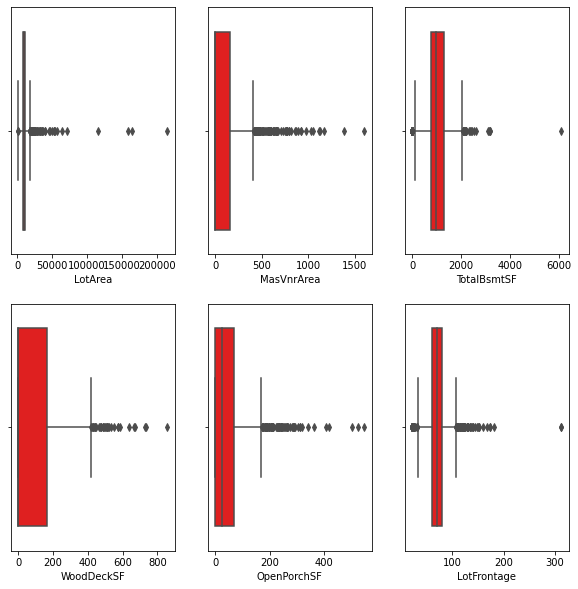

In [21]:
### analysing columns in categorical data where more than 98 percent values belonged to only 1 class
count = 0
out = ['LotArea','MasVnrArea','TotalBsmtSF','WoodDeckSF','OpenPorchSF','LotFrontage']
plt.subplots(2, 3, figsize = (10, 10), sharex = False, sharey = True)
for j in out:
    plt.subplot(2, 3, count + 1)
    b = sns.boxplot(x =df[j],color = 'red')
    b.set_xlabel(j, fontsize = 10)
#     b.set_ylabel('SalePrice', fontsize = 10)
    b.tick_params(labelsize = 10)
    count += 1
# plt.show()

In [22]:
### removing outliers for below columns by elimitaing values lying above 98 percentile
outlier_feat = ['LotArea','MasVnrArea','TotalBsmtSF','WoodDeckSF','OpenPorchSF']
for r in outlier_feat:
    print(r)
    med = df[r].quantile(.98)
    df = df[df[r]<med]

LotArea
MasVnrArea
TotalBsmtSF
WoodDeckSF
OpenPorchSF


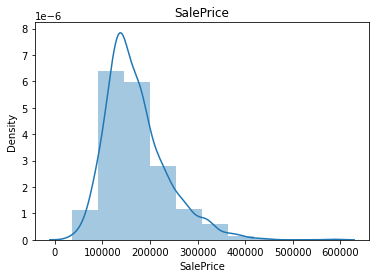

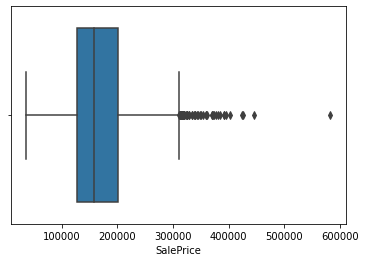

In [23]:
## visualizing target columns for distribution


plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

sns.boxplot(df['SalePrice'])
plt.show()


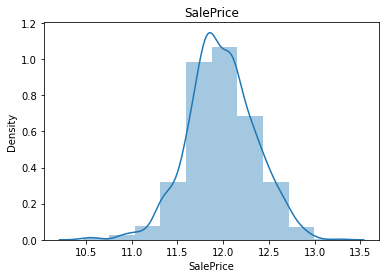

In [24]:
## transforming using log transform so as to bring down to one scale
df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()


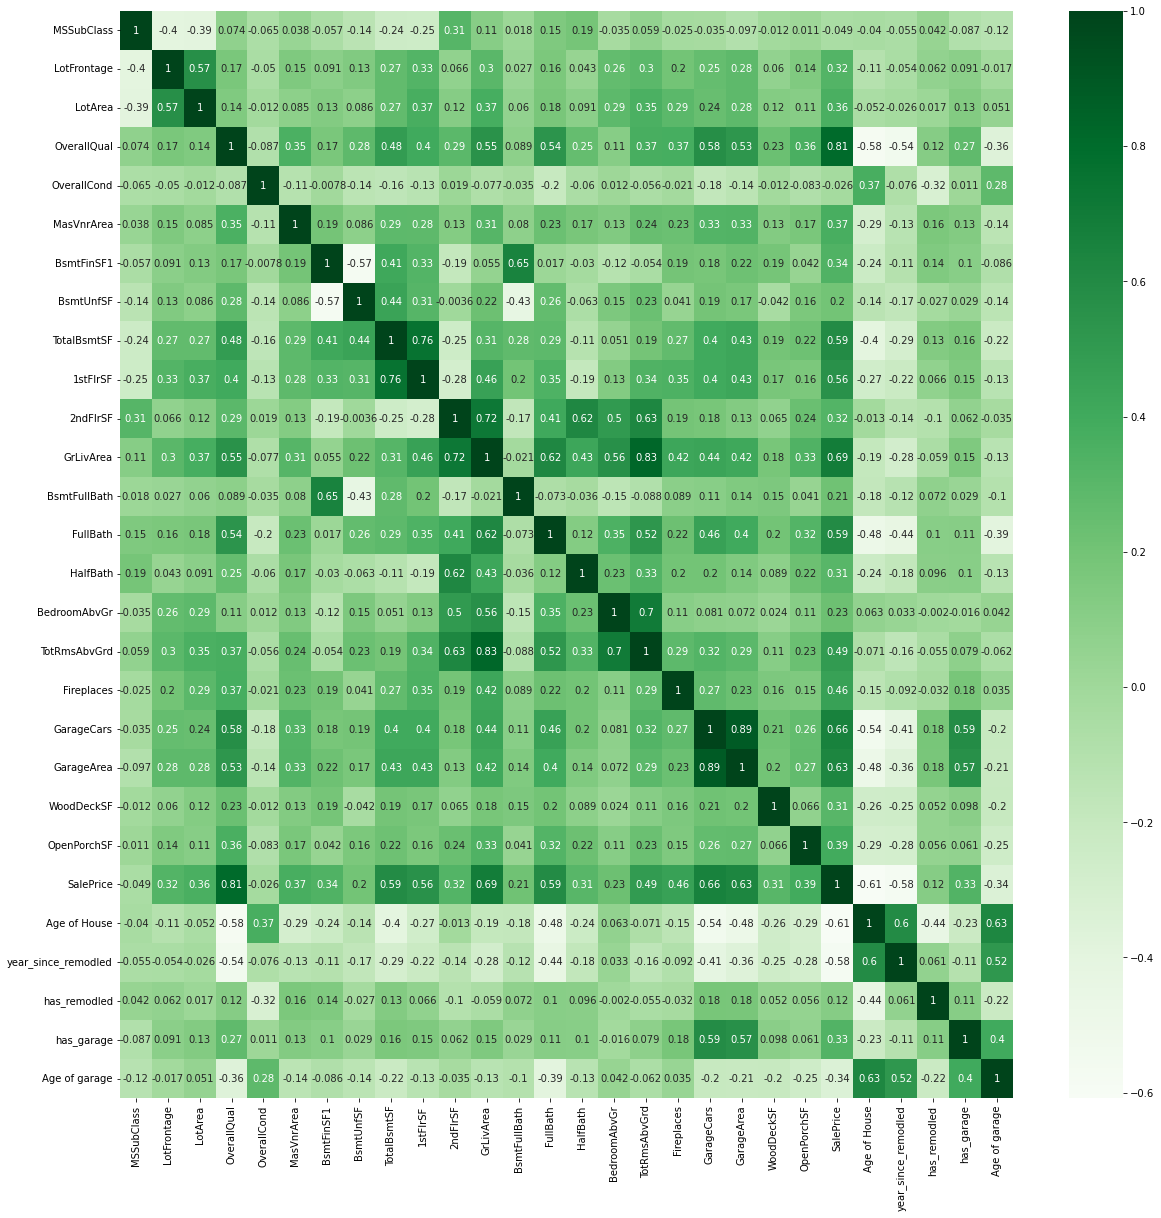

In [25]:
## checking correlations

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

In [26]:
#### Dropping columns whwere corelation coefficeint is >|.80|
df.drop(['GarageArea','TotRmsAbvGrd'], axis = 1, inplace = True)


In [27]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SalePrice,Age of House,year_since_remodled,has_remodled,has_garage,Age of garage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,12.247699,19,19,1,1,19
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,12.109016,46,46,1,1,46
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,12.317171,21,20,0,1,21
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,11.849405,107,52,0,1,24
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,12.429220,22,22,1,1,22


<Figure size 720x360 with 0 Axes>

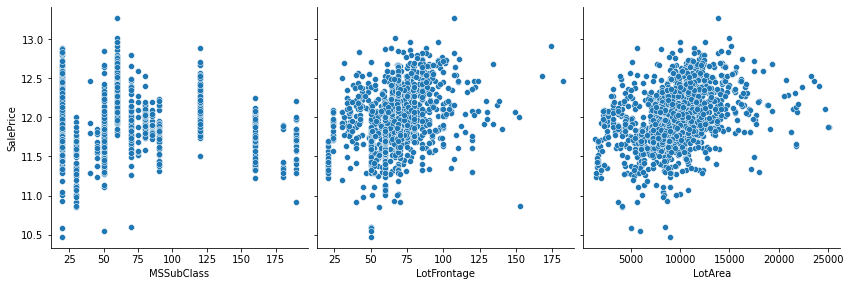

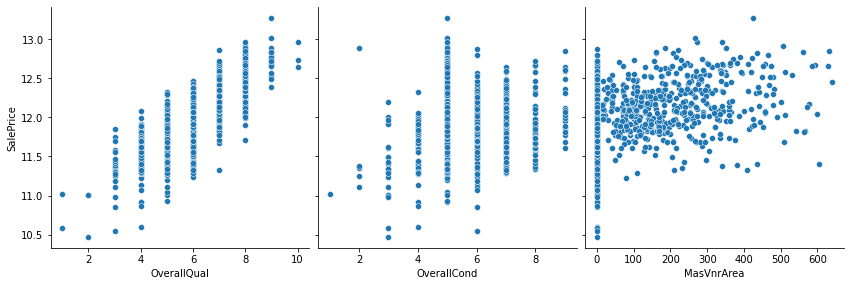

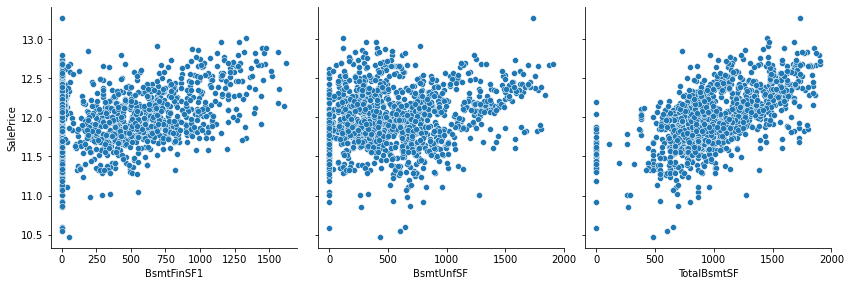

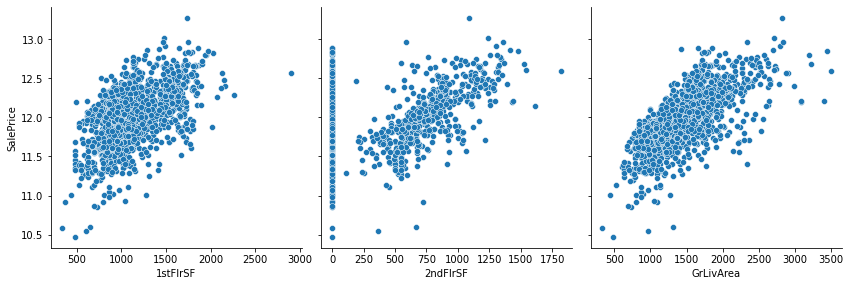

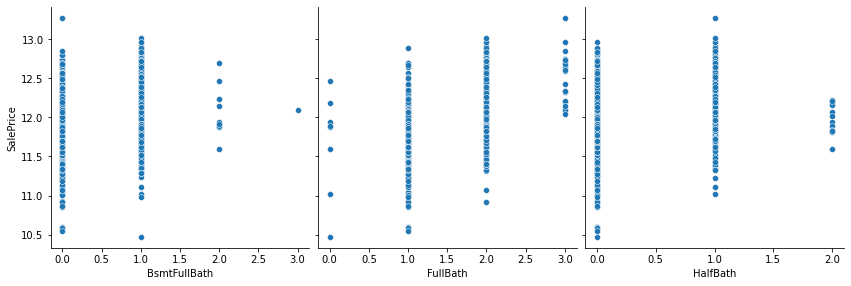

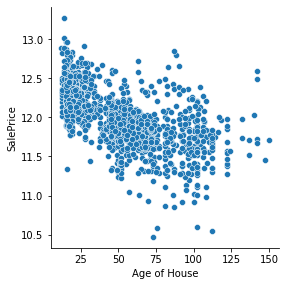

In [28]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')


sns.pairplot(df, x_vars=['Age of House'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()


In [29]:
df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })




In [30]:

df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SalePrice,Age of House,year_since_remodled,has_remodled,has_garage,Age of garage
0,60,RL,65.0,8450,3,5,CollgCr,1,4,7,5,Gable,VinylSd,VinylSd,1,196.0,4,PConc,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,Attchd,2,2,0,61,0,12.247699,19,19,1,1,19
1,20,RL,80.0,9600,3,2,Veenker,1,1,6,8,Gable,MetalSd,MetalSd,0,0.0,3,CBlock,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,Attchd,2,2,298,0,0,12.109016,46,46,1,1,46
2,60,RL,68.0,11250,2,5,CollgCr,1,4,7,5,Gable,VinylSd,VinylSd,1,162.0,4,PConc,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,Attchd,2,2,0,42,0,12.317171,21,20,0,1,21
3,70,RL,60.0,9550,2,4,Crawfor,1,4,7,5,Gable,Wd Sdng,Wd Shng,0,0.0,3,BrkTil,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,Detchd,1,3,0,35,0,11.849405,107,52,0,1,24
4,60,RL,84.0,14260,2,2,NoRidge,1,4,8,5,Gable,VinylSd,VinylSd,1,350.0,4,PConc,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,Attchd,2,3,192,84,0,12.429220,22,22,1,1,22


In [31]:
df.shape

(1317, 47)

In [32]:
dummy_var = ['MSZoning' , 'Neighborhood' , 'RoofStyle' , 'Exterior1st' , 'Exterior2nd' ,'Foundation' , 'GarageType']
df = pd.get_dummies(df,columns=dummy_var,drop_first =True)
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SalePrice,Age of House,year_since_remodled,has_remodled,has_garage,Age of garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,196.0,4,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,2,2,0,61,0,12.247699,19,19,1,1,19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,0.0,3,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,2,2,298,0,0,12.109016,46,46,1,1,46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,162.0,4,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,2,2,0,42,0,12.317171,21,20,0,1,21,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,0.0,3,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,1,3,0,35,0,11.849405,107,52,0,1,24,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,350.0,4,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,2,3,192,84,0,12.429220,22,22,1,1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [33]:
df.shape

(1317, 113)

In [34]:
for r in df.columns:
    print(r)

MSSubClass
LotFrontage
LotArea
LotShape
LotConfig
BldgType
HouseStyle
OverallQual
OverallCond
MasVnrType
MasVnrArea
ExterQual
BsmtQual
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
HeatingQC
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
KitchenQual
Fireplaces
FireplaceQu
GarageFinish
GarageCars
WoodDeckSF
OpenPorchSF
Fence
SalePrice
Age of House
year_since_remodled
has_remodled
has_garage
Age of garage
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
RoofStyle_Ga

In [35]:
df.shape

(1317, 113)

### Modeling part

In [36]:
train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
train.shape,test.shape

((921, 113), (396, 113))

In [38]:
scaler = StandardScaler() ## tried using min max scalar , it was giving very huge test values

In [39]:
train[train.columns] = scaler.fit_transform(train[train.columns])
test[test.columns] = scaler.transform(test[test.columns])

In [40]:
### seperating dependant and independant variables in test train set
y_test = test.pop('SalePrice')
X_test = test
y_train = train.pop('SalePrice')
X_train = train

### Using RFE for feature elemination

In [41]:
# Reducing feature count using RFE ,  reducing features to 75 first

## model
lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE
rfe = RFE(lm, n_features_to_select =75)            
rfe = rfe.fit(X_train, y_train)
# Assign the columns selected by RFE to cols

ref_col = X_train.columns[rfe.support_]

# Feature selected 

rfe_df = pd.DataFrame(list(X_train.columns), columns=['Feature'])
rfe_df

,Feature
0,MSSubClass
1,LotFrontage
2,LotArea
3,LotShape
4,LotConfig
5,BldgType
6,HouseStyle
7,OverallQual
8,OverallCond
9,MasVnrType


In [42]:
## moving forward with new features selected by RFE
X_train_rfe = X_train[ref_col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## modeling

In [43]:
def metric(y_true, y_pred):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    rss = np.sum(np.square(y_true - y_pred))
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = mse ** 0.5
    kj = pd.DataFrame({'r2_score':[r2],'rss':[rss],'mse':[mse],'rmse':[rmse]})
    return kj
#     print(F'R2 - {r2}\nRSS - {rss}\nMSE - {mse}\nRMSE - {rmse}')

In [44]:
## trying out simple linear regression first to see how the fit is
lm = LinearRegression()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

    
y_train_pred = lr_model.predict(X_train)
train_mat = metric(y_train, y_train_pred)

print()
y_test_pred = lr_model.predict(X_test)
test_mat = metric(y_test, y_test_pred)


In [45]:
train_mat

,r2_score,rss,mse,rmse
0,0.923243,70.693285,0.076757,0.277051


In [46]:
test_mat

,r2_score,rss,mse,rmse
0,-4.396812e+21,1.709558e+24,4.317066e+21,6.570439e+10


### `There is a huge value gap in the r2 scores of train and test indicating towards overfitting , hence we move towards Regularized regression`

### Ridge Regression

In [47]:


params = {'alpha': [0.0001, 0.001,0.00004,0.002,0.0003,0.0005,0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20,30,31,32,33,34,35,36,37,38,39,40,41,45,47,44,43,42,45.5,44.5,48,52,54 ,50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 4e-05, 0.002, 0.0003, 0.0005,
                                   0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 30, 31, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
39,41,-0.197348,-0.219387,1
44,42,-0.197404,-0.219388,2
38,40,-0.197292,-0.219390,3
43,43,-0.197461,-0.219390,4
37,39,-0.197236,-0.219396,5
42,44,-0.197519,-0.219397,6
46,44.5,-0.197548,-0.219401,7
36,38,-0.197182,-0.219403,8
40,45,-0.197578,-0.219407,9
35,37,-0.197128,-0.219411,10


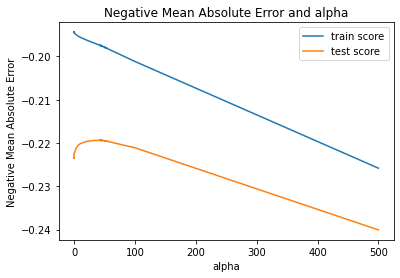

In [49]:
# plotting mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [50]:

# Extracting bets lambda value
ridge_model_cv.best_estimator_



Ridge(alpha=41)

In [51]:

alpha = 41
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=41)

In [52]:
# Check the mean squared error
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
ridge_test = metric(y_test,y_pred)
ridge_train = metric(y_train,y_train_pred)

In [53]:
### trues doubling the optimal value of alpha


alpha = 41*2
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)

# Check the mean squared error
y_pred = ridge_double.predict(X_test)
y_train_pred = ridge_double.predict(X_train)
ridge_test_d = metric(y_test,y_pred)
ridge_train_d = metric(y_train,y_train_pred)

In [54]:
ridge_test_d , ridge_train_d 

(   r2_score        rss       mse     rmse
 0  0.874294  48.876525  0.123426  0.35132,
    r2_score       rss      mse      rmse
 0   0.92036  73.34873  0.07964  0.282206)

In [55]:
ridge_test

,r2_score,rss,mse,rmse
0,0.873682,49.114597,0.124027,0.352174


In [56]:
ridge_train

,r2_score,rss,mse,rmse
0,0.921792,72.029833,0.078208,0.279657


In [57]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0177
1,LotFrontage,0.0220
2,LotArea,0.0409
3,BldgType,-0.0317
4,OverallQual,0.1825
5,OverallCond,0.1229
6,BsmtQual,0.0386
7,BsmtExposure,0.0370
8,BsmtFinSF1,0.0528
9,BsmtUnfSF,-0.0248


### Performing Rfe to further reduce features to 25

In [59]:

X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

#RFE
rfe = RFE(lm, n_features_to_select = 25)            
rfe = rfe.fit(X_train_ridge, y_train)

In [60]:

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
rfe_25_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
rfe_25_df= rfe_25_df.loc[rfe_25_df['rfe_support'] == True]
rfe_25_df.reset_index(drop=True, inplace=True)

rfe_25_df['Coefficient'] = rfe_25_df['Features'].apply(lambda x: ridge_coeff_dict[x])
rfe_25_df = rfe_25_df.sort_values(by=['Coefficient'], ascending=False)
rfe_25_df = rfe_25_df.head(10)
print("TOP 5 features and their coefficient")
rfe_25_df




TOP 5 features and their coefficient


,Features,rfe_support,rfe_ranking,Coefficient
6,GrLivArea,True,1,0.1847
1,OverallQual,True,1,0.1825
2,OverallCond,True,1,0.1229
4,TotalBsmtSF,True,1,0.1101
10,GarageCars,True,1,0.0779
23,Foundation_PConc,True,1,0.0740
13,MSZoning_RL,True,1,0.0569
5,HeatingQC,True,1,0.0496
7,BsmtFullBath,True,1,0.0478
22,Exterior2nd_Wd Sdng,True,1,0.0473


In [61]:


params = {'alpha': [0.0001, 0.001,0.00004,0.002,0.0003,0.0005,0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20,30,31,32,33,34,35,36,37,38,39,40,41,45,47,44,43,42,45.5,44.5,48,52,54 ,50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv1.fit(X_train[rfe_25_df['Features']], y_train) 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 4e-05, 0.002, 0.0003, 0.0005,
                                   0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 30, 31, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv1.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
49,54,-0.268953,-0.272183,1
48,52,-0.268932,-0.272183,2
50,50,-0.268913,-0.272184,3
47,48,-0.268898,-0.272186,4
41,47,-0.268892,-0.272187,5
45,45.5,-0.268884,-0.272189,6
40,45,-0.268882,-0.272189,7
46,44.5,-0.268880,-0.272190,8
42,44,-0.268879,-0.272190,9
43,43,-0.268877,-0.272191,10


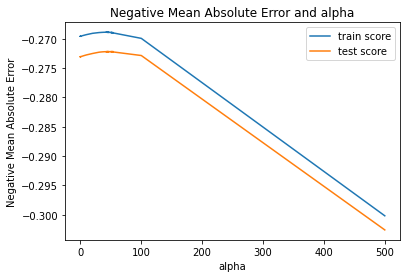

In [63]:
# plotting mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [64]:

# Extracting bets lambda value
ridge_model_cv.best_estimator_



Ridge(alpha=41)

In [65]:

alpha = 41
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=41)

In [66]:
# Check the mean squared error
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
ridge_test = metric(y_test,y_pred)
ridge_train = metric(y_train,y_train_pred)

In [67]:
ridge_test

,r2_score,rss,mse,rmse
0,0.873682,49.114597,0.124027,0.352174


In [68]:
ridge_train

,r2_score,rss,mse,rmse
0,0.921792,72.029833,0.078208,0.279657


## lasso

In [69]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004,0.0045,0.0041,0.0042,0.0043,0.0044, 0.005,0.006, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.0045, 0.0041,
                                   0.0042, 0.0043, 0.0044, 0.005, 0.006,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
#mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,0.005,-0.200908,-0.221081,1
7,0.003,-0.198597,-0.221101,2
9,0.0045,-0.200306,-0.221142,3
6,0.002,-0.197512,-0.221145,4
13,0.0044,-0.200193,-0.221158,5
12,0.0043,-0.200080,-0.221181,6
11,0.0042,-0.199970,-0.221207,7
10,0.0041,-0.199860,-0.221231,8
8,0.004,-0.199745,-0.221254,9
5,0.001,-0.195970,-0.221353,10


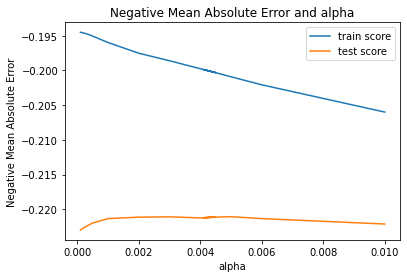

In [71]:
# mean test vs train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
# lasso best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.005)

In [73]:
alpha =0.005
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 


Lasso(alpha=0.005)

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_lasso = lasso.predict(X_test)
y_pred_lasso_train = lasso.predict(X_train)
test_lasso = metric(y_test,y_pred_lasso)
train_lasso = metric(y_train,y_pred_lasso_train)

In [75]:
test_lasso

,r2_score,rss,mse,rmse
0,0.876784,47.90872,0.120982,0.347824


In [76]:
train_lasso

,r2_score,rss,mse,rmse
0,0.919178,74.437109,0.080822,0.284292


In [77]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0153
1,LotFrontage,0.0198
2,LotArea,0.0337
3,BldgType,-0.0243
4,OverallQual,0.2066
5,OverallCond,0.1344
6,BsmtQual,0.0172
7,BsmtExposure,0.0299
8,BsmtFinSF1,0.0627
9,BsmtUnfSF,-0.0151


In [78]:
# using rfe to minimize features to 5
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)
rfe = RFE(lm, n_features_to_select = 5)            
rfe = rfe.fit(X_train_lasso, y_train)

In [79]:


temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(lambda x: lasso_coeff_dict[x])
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
3,GrLivArea,True,1,0.323350
0,OverallQual,True,1,0.206598
1,OverallCond,True,1,0.134356
2,TotalBsmtSF,True,1,0.115859
4,Age of House,True,1,-0.193714


In [80]:
temp2_df.Features.values

array(['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'Age of House'], dtype=object)

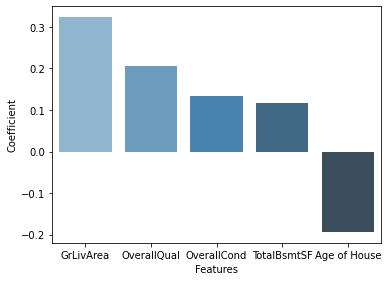

In [81]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(x = 'Features', y='Coefficient', palette="Blues_d", data = temp2_df)
plt.show()

# Conclusion :

- Lambda value:
    - Ridge - 41
    - Lasso - 0.0005
    
- COmparing mean sqaure error fro both type of regilarization:
    - Ridge - 0.352174
    - Lasso - 0.120982

- The Mean Squared Error significantly lower than that of Ridge

- Important factors are -
    - Age of the house(how old is property) - inverse relation
    - total baseemnt surface
    - Overrall condition
    - overrall quality
    - grliving area
    


### Qustion 3
After building the model, you realised that the five most important predictor variables in 
the lasso model are not available in the incoming data.
You will now have to create another model excluding the five most important predictor variables.
Which are the five most important predictor variables now?

In [82]:
ext = ['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'Age of House']
ft = [r for r in X_train.columns if r not in ext ]
X_train1 = X_train[ft]
X_test = X_test[ft]

In [83]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004,0.0045,0.0041,0.0042,0.0043,0.0044, 0.005,0.006, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.0045, 0.0041,
                                   0.0042, 0.0043, 0.0044, 0.005, 0.006,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
#mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.229903,-0.256127,1
5,0.001,-0.228232,-0.256635,2
7,0.003,-0.231954,-0.256979,3
4,0.0005,-0.227593,-0.257096,4
3,0.0004,-0.227501,-0.257295,5
2,0.0003,-0.227418,-0.257570,6
8,0.004,-0.233834,-0.257776,7
10,0.0041,-0.233999,-0.257836,8
1,0.0002,-0.227359,-0.257847,9
11,0.0042,-0.234164,-0.257891,10


In [85]:
# lasso best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.002)

In [86]:
alpha =0.002
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train1, y_train) 


Lasso(alpha=0.002)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_lasso = lasso.predict(X_test)
y_pred_lasso_train = lasso.predict(X_train1)
test_lasso = metric(y_test,y_pred_lasso)
train_lasso = metric(y_train,y_pred_lasso_train)

In [88]:
test_lasso

,r2_score,rss,mse,rmse
0,0.8367,63.493856,0.160338,0.400422


In [89]:
lasso_df = pd.DataFrame({'Features':X_train1.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.head()

,Features,Coefficient
0,MSSubClass,-0.0324
1,LotFrontage,0.0099
2,LotArea,0.0265
3,BldgType,-0.0270
4,BsmtQual,0.0887


In [90]:
# using rfe to minimize features to 5
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train1.columns))
X_train_lasso = X_train1[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)
rfe = RFE(lm, n_features_to_select = 5)            
rfe = rfe.fit(X_train_lasso, y_train)

In [91]:
temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(lambda x: lasso_coeff_dict[x])
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,2ndFlrSF,True,1,0.343444
1,1stFlrSF,True,1,0.294310
0,BsmtQual,True,1,0.088736
4,GarageCars,True,1,0.084560
3,KitchenQual,True,1,0.083817


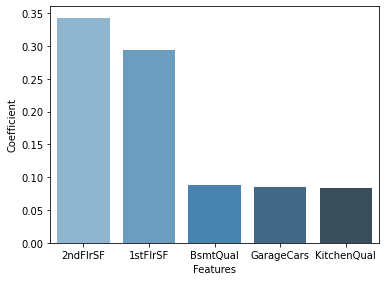

In [92]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(x = 'Features', y='Coefficient', palette="Blues_d",  data = temp2_df,color = 'green')
plt.show()